<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [4]:
import pandas as pd
df = pd.DataFrame({'a': [5,9,1,0,4], 'b': [10,4,3,1,9]})
df.head()

,a,b
0,5,10
1,9,4
2,1,3
3,0,1
4,4,9


In [5]:
# How can we quickly look at some descriptive statistics of the above dataframe?

df.describe()

,a,b
count,5.000000,5.000000
mean,3.800000,5.400000
std,3.563706,3.911521
min,0.000000,1.000000
25%,1.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,9.000000
max,9.000000,10.000000


## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

# mean
mu = 0

# standard deviation
sigma = 1

# random sample
sample = np.random.normal(mu, sigma, 1000)

In [0]:
# Verify the mean of our sample



True

In [0]:
# Verify the variance of our sample


True

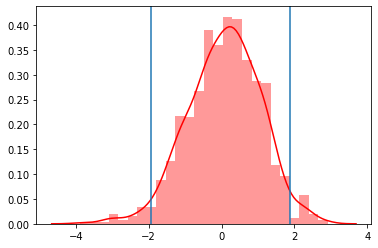

In [9]:
import seaborn as sns

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample, 97.5), 0)
ax.axvline(np.percentile(sample, 2.50), 0);

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

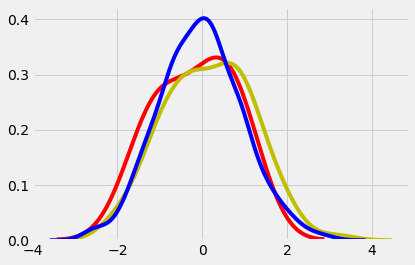

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means

3 types of t-tests

There are three main types of t-test:
1. An Independent Samples t-test compares the means for two groups.
2. A Paired sample t-test compares means from the same group at different times.
3. A One sample t-test tests the mean of a single group against a known mean.



T-Test Assumptions:

1. the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.
2. the data is collected from a representative, randomly selected portion of the total population.
3. the data, when plotted, results in a normal distribution, bell-shaped distribution curve.
4. a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.
5. homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

In [0]:
#### Example: sample data -- number of "conversions" between two versions of a website, over 10 days
a=[1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]
b=[1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248]

In [17]:
print(np.mean(a))
print(np.mean(b))
np.mean(a) - np.mean(b)

1186.0
1222.0


-36.0

Generate a hypothesis

1. Null hypothesis: website A has the same average conversion rate as website B
2. Alternative hypothesis (1-tailed): website A has lower/higher average conversion rate than website B
Alternative hypothesis 
3. (2-tailed): website A has different average conversion rate than website B 

In [0]:
# import

from scipy.stats import ttest_ind

In [27]:
# run a t-test

ttest_ind(a,b) # two tailed

Ttest_indResult(statistic=-2.2795770510504845, pvalue=0.03504505626727664)

In [28]:
ttest_ind(a,b).pvalue/2 # one tailed

0.01752252813363832

In [29]:
# interpret the p-value
# 95% confidence interval (alpha = .05)
# 99% confidence interval (alpha = .01)
# 99.9% confidence interval (alpha = .001)

ttest_ind(a,b).pvalue < 0.05

True

![tstat](https://blog.minitab.com/hubfs/Imported_Blog_Media/formula_1t.png)

A common analogy is that the t-value is the signal-to-noise ratio.

**The numerator is the signal.** bold text You simply take the sample mean and subtract the null hypothesis value. As the difference between the sample mean and the null hypothesis mean increases in either the positive or negative direction, the strength of the signal increases.

**The denominator is the noise.** The equation in the denominator is a measure of variability known as the standard error of the mean. This statistic indicates how accurately your sample estimates the mean of the population. A larger number indicates that your sample estimate is less precise because it has more random error.

**Both the signal and noise values are in the units of your data.** If your signal is 6 and the noise is 2, your t-value is 3. This t-value indicates that the difference is 3 times the size of the standard error. However, if there is a difference of the same size but your data have more variability (6), your t-value is only 1. The signal is at the same scale as the noise.
https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

Our first 2-sample t-test (pancake example)

1) Null Hypothesis: (boring hypothesis)

𝑥¯1==𝑥¯2

Or that the average cooking time between the two burners is the same.

2) Alternative Hypothesis: (the opposite of the null)

𝑥¯1≠𝑥¯2

𝑥¯1−𝑥¯2≠0 3) Confidence Level: The probability of seing a true result in spite of random variability. (How often do I want to make sure that I'm right.) Typically: 95%, 99%, 99.9%

In [0]:
# import

from scipy.stats import ttest_ind

In [38]:
# sample 1
mu1 = 180 # sample mean
sigma1 = 5 # std

sample1 = np.random.normal(mu1, sigma1, 1000)
sample1[:5]

array([180.95731725, 186.28483006, 170.4308277 , 179.93474207,
       182.61857096])

In [39]:
# sample 2
mu2 = 178.5 # sample mean
sigma2 = 4.25 # std

sample2 = np.random.normal(mu2, sigma2, 800)
sample2[:5]

array([176.37856495, 177.17330094, 176.91109325, 183.12320851,
       181.2897322 ])

In [41]:
# compare

results = ttest_ind(sample1, sample2)
results

Ttest_indResult(statistic=7.641803004873706, pvalue=3.46166192329898e-14)

In [46]:
# what is the pvalue
# divide by 2 for one-tailed pvalue

print('{:.15f}'.format(results[1]/2))

0.000000000000017


# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


In [0]:
d_df10 = np.random.standard_t(df=10, size=10)

Lets perform a ttest

In [0]:
#import
import pandas as pd

In [59]:
# import data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [61]:
# set column headers

df.columns = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
print(df.shape)
df

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [63]:
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [64]:
# how many per each party

df['party'].value_counts().sort_index()

democrat      267
republican    168
Name: party, dtype: int64

In [67]:
# how did republicans vote

rep = df[df['party'] == 'republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [68]:
# how did democrats vote

dem = df[df['party'] == 'democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [72]:
# the percentage of republicans who voted yes on the handicapped infants bull
rep['handicapped-infants'].sum()/len(rep)

0.18452380952380953

In [92]:
# remove null values from column and calculate percentage again

np.isnan(rep['handicapped-infants'])
hi_no_nans = col[~np.isnan(rep['handicapped-infants'])]

# same column as before but with no null values
hi_no_nans

0      0.0
1      0.0
7      0.0
8      0.0
10     0.0
      ... 
427    0.0
430    0.0
432    0.0
433    0.0
434    0.0
Name: handicapped-infants, Length: 165, dtype: float64

In [78]:
# recalculate percentage of republicans
hi_no_nans.sum()/len(hi_no_nans)

0.18787878787878787

In [79]:
rep['handicapped-infants'].mean()

0.18787878787878787

water project bill (two-sample t-test)

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the water-project bill between democrats and republicans in the house of representatives. (support is equal)

𝑥¯1==𝑥¯2 Where 𝑥¯1 is the mean of republican votes and 𝑥¯2 is the mean of democrat votes.

2) Alternative Hypothesis:

𝑥¯1≠𝑥¯2 Levels of support between the two parties will differ.

3) 95% Confidence Level


In [0]:
# import

In [82]:
# what is mean support of republicans

rep['water-project'].mean()

0.5067567567567568

In [84]:
# what is mean support of democrats

dem['water-project'].mean()

0.502092050209205

In [86]:
# compare with a ttest

ttest_ind(rep['water-project'], dem['water-project'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [87]:
# account for nans

ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

In [0]:
# what is sample size for the two samples

col = rep['water-project']
rep_wp_no_nans = col[~np.isnan(col)]
col = dem['water-project']
dem_wp_no_nans = col[~np.isnan(col)]

In [114]:
print(len(rep_wp_no_nans))
print(len(dem_wp_no_nans))

148
239


When I have multiple samples (using a 2-sample t-test) I will use the smaller of the two samples to determine my degrees of freedom

So in this case, df = 148-1 = 147

4) T-statistic: .089

5) P-value: .929

I want to reject the null hypothesis if my p-value is < .05 or if my p-value is less than (1-confidence_level)

Conclusion: due to a p-value of .929 I fail to reject the null hypothesis that republican and democrat support for the water-project bill is different.

I never say that I "accept" the null hypothesis, I just say that I "fail to reject"


1-sample T-test example

I'm only using one sample, and my null hypothesis will be different.

We're looking at Democrat support of the South-Africa bill

1a) Null Hypothesis:

𝑥¯1 (average dem support for SA bill) == 1.

This says that 100% of democrats support this bill. Full support.

1b) Null Hypothesis:

𝑥¯1 (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

1c) Null Hypothesis:

𝑥¯1 (average dem support for SA bill) == 0.

This says that 0% of democrats support this bill. The party is against the bill.

1d) Null Hypothesis:

𝑥¯1 (average dem support for SA bill) == .78245

This says that 0% of democrats support this bill. The party is against the bill.

**With 1-sample t-tests I can frame that I'm asking through my choice of null hypothesis**

1) Null Hypothesis: 𝑥¯1 (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

2) Alternative Hypothesis: Support is not equal to .5 or 50%

𝑥¯1 (average dem support for SA bill) ≠ .5

This says nothing about if support is greater than or less than 50%, it's just saying that it's not 50% - it's different, it's something other than 50%.

3) Confidence Level: 95%


In [0]:
# import
from scipy.stats import ttest_1samp

In [120]:
# conduct ttest
ttest_1samp(dem['south-africa'], .50, nan_policy='omit')

Ttest_1sampResult(statistic=23.965755112488182, pvalue=1.7513759267849718e-58)

Due to a p-value of (basically 0) we reject the null hypothesis that democrat support for the South Africa bill is .5 (split party) and conclude that it is something different.

In [121]:
# what is the average support of democrats in our sample

dem['south-africa'].mean()

0.9351351351351351

In [122]:
# is it significantly different from 90% from the population I'm trying to compare to

ttest_1samp(dem['south-africa'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=1.935123083617057, pvalue=0.05450836316336539)

Fail to reject the null hypothesis:

I conclude that that democrat support for the South Africa bill is not significantly different from 90%.

In [124]:
# what about 89.9

ttest_1samp(dem['south-africa'], .899, nan_policy='omit')

Ttest_1sampResult(statistic=1.9901996636892347, pvalue=0.048049640325191705)

Due to a p-value of .048, I reject the null hypothesis that democrat support for this bill is 89.9% and suggest the alternative that it is different from 89.9%

WINE EXAMPLE

In [0]:
# load the data

from sklearn.datasets import load_wine
X = load_wine()

In [0]:
# put that into data frame

wine = pd.DataFrame(X['data'], columns=X['feature_names'])
wine['origin'] = X['target']

In [135]:
# take a look
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [137]:
# examine a column. ash for all 3 origins groups

wine['origin'].value_counts()

1    71
0    59
2    48
Name: origin, dtype: int64

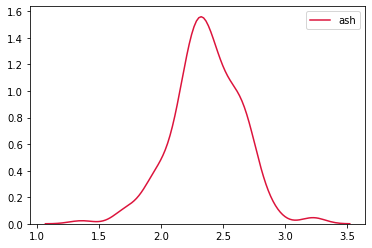

In [139]:
import seaborn as sns
sns.kdeplot(wine['ash'], color='crimson')

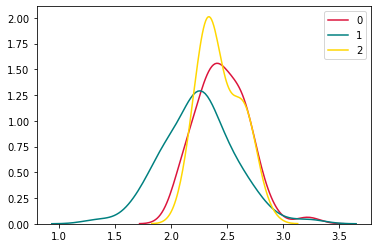

In [140]:
# now for each group . Are these groups different or the same
colorlist = ['crimson', 'teal', 'gold']

for x in [0,1,2]:
  sns.kdeplot(wine[wine['origin'] == x]['ash'], color=colorlist[x], label=x)

In [143]:
# are they different or the same
for x in [0,1,2]:
  print(wine[wine['origin'] == x]['ash'].mean())
  print(wine[wine['origin'] == x]['ash'].std())

2.455593220338984
0.2271659820517139
2.244788732394365
0.31546726864369473
2.4370833333333333
0.1846901756805375


In [0]:
# create two data frames (samples) from the two origins in order to compare to ttest

ash1 = wine[wine['origin'] == 1]['ash']
ash2 = wine[wine['origin'] == 2]['ash']

In [145]:
ttest_ind(ash1, ash2)

Ttest_indResult(statistic=-3.802392838959142, pvalue=0.00022925708961331424)

In [146]:
ttest_ind(ash1, ash2).pvalue < 0.05

True

ALCOHOL CONTENT

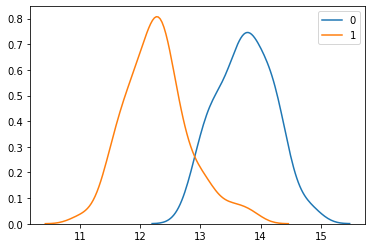

In [147]:
# compare mean alcohol for two origins groups

for group in range (0,2):
  sns.kdeplot(wine[wine['origin'] == group]['alcohol'], label=group)

In [0]:
# create the groups

group1 = wine[wine['origin'] == 1]['alcohol']
group2 = wine[wine['origin'] == 2]['alcohol']

In [149]:
ttest_ind(group1, group2)

Ttest_indResult(statistic=-8.75468634298109, pvalue=1.8274340185929396e-14)

In [150]:
# format it so its not in scientific notation

p = ttest_ind(group1, group2).pvalue
print('{:.15f}'.format(p))

0.000000000000018
